In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge, Lasso ,LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import load_boston 
import warnings
warnings.filterwarnings("ignore") 

In [4]:
boston=load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [13]:
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["Price"]=boston.target
boston_df['Price']= boston.target 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [15]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [16]:
X=boston_df.drop(['Price'],axis=1)
y=boston_df['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
dt_Reg = DecisionTreeRegressor(max_depth=4)
dt_Reg.fit(X_train,y_train)

score = dt_Reg.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_Reg.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_Reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("RMSE :",mse**(1/2.0))



R-squared Train  : 0.8857388736713648
R-squared Test  : 0.8646893116543823
MSE : 12.40183173970917
RMSE : 3.521623452288613


[Text(0.42, 0.9, 'X[12] <= 9.545\nsquared_error = 81.189\nsamples = 354\nvalue = 22.34'),
 Text(0.16, 0.7, 'X[5] <= 7.435\nsquared_error = 78.714\nsamples = 136\nvalue = 29.99'),
 Text(0.08, 0.5, 'X[7] <= 1.485\nsquared_error = 45.062\nsamples = 117\nvalue = 27.666'),
 Text(0.04, 0.3, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.12, 0.3, 'X[5] <= 6.542\nsquared_error = 28.375\nsamples = 113\nvalue = 26.875'),
 Text(0.08, 0.1, 'squared_error = 11.126\nsamples = 53\nvalue = 22.892'),
 Text(0.16, 0.1, 'squared_error = 17.222\nsamples = 60\nvalue = 30.393'),
 Text(0.24, 0.5, 'X[11] <= 361.925\nsquared_error = 47.9\nsamples = 19\nvalue = 44.3'),
 Text(0.2, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 21.9'),
 Text(0.28, 0.3, 'X[10] <= 17.9\nsquared_error = 21.137\nsamples = 18\nvalue = 45.544'),
 Text(0.24, 0.1, 'squared_error = 13.034\nsamples = 14\nvalue = 47.093'),
 Text(0.32, 0.1, 'squared_error = 11.737\nsamples = 4\nvalue = 40.125'),
 Text(0.68, 0.7, 'X[12] <= 19.26\n

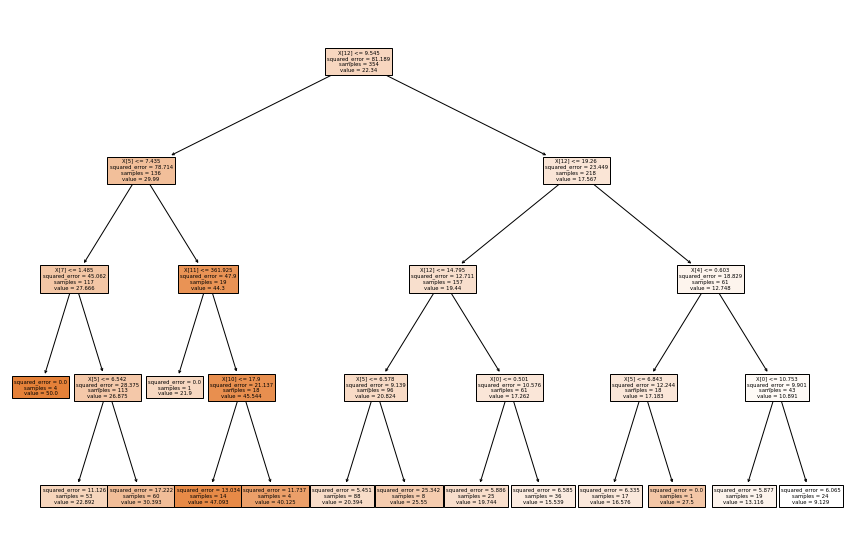

In [22]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_Reg,filled=True)